In [1]:
!gdown https://drive.google.com/uc?id=19_eiPkFavqZqBcV1VaHTCy4_FT7WNzAz
!gdown https://drive.google.com/uc?id=1aZvyKMazNxm8XonZNDVwlalJWIcQROVP
!gdown https://drive.google.com/uc?id=1Qlbcd_TMN-NalLes0R5nKazeqVYeprpv
!gdown https://drive.google.com/uc?id=1SgbztY1wn_g91i-b2v2MaAeoK3sLPAMx
!gdown https://drive.google.com/uc?id=1gtCttiRNBRJXVpC4ZgYN9kNVD2_Mvf2O

Downloading...
From: https://drive.google.com/uc?id=19_eiPkFavqZqBcV1VaHTCy4_FT7WNzAz
To: /content/vectors.csv
100% 131M/131M [00:00<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aZvyKMazNxm8XonZNDVwlalJWIcQROVP
To: /content/attributes.csv
100% 202k/202k [00:00<00:00, 68.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qlbcd_TMN-NalLes0R5nKazeqVYeprpv
To: /content/svm_hair_length.sav
100% 1.85M/1.85M [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SgbztY1wn_g91i-b2v2MaAeoK3sLPAMx
To: /content/svm_hair.sav
100% 10.0M/10.0M [00:00<00:00, 43.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gtCttiRNBRJXVpC4ZgYN9kNVD2_Mvf2O
To: /content/svm_eyes.sav
100% 10.2M/10.2M [00:00<00:00, 41.9MB/s]


In [2]:
!gdown https://drive.google.com/uc?id=1zgT5-UOa9oby2mViweBQTaYmhsfwvHje

Downloading...
From: https://drive.google.com/uc?id=1zgT5-UOa9oby2mViweBQTaYmhsfwvHje
To: /content/Generator_v2_150.pth
100% 98.0M/98.0M [00:00<00:00, 110MB/s]


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
from StyleGAN import *
from manipulate import *
import torch
import math

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else'cpu')
G = torch.load("Generator_v2_150.pth", map_location=device)

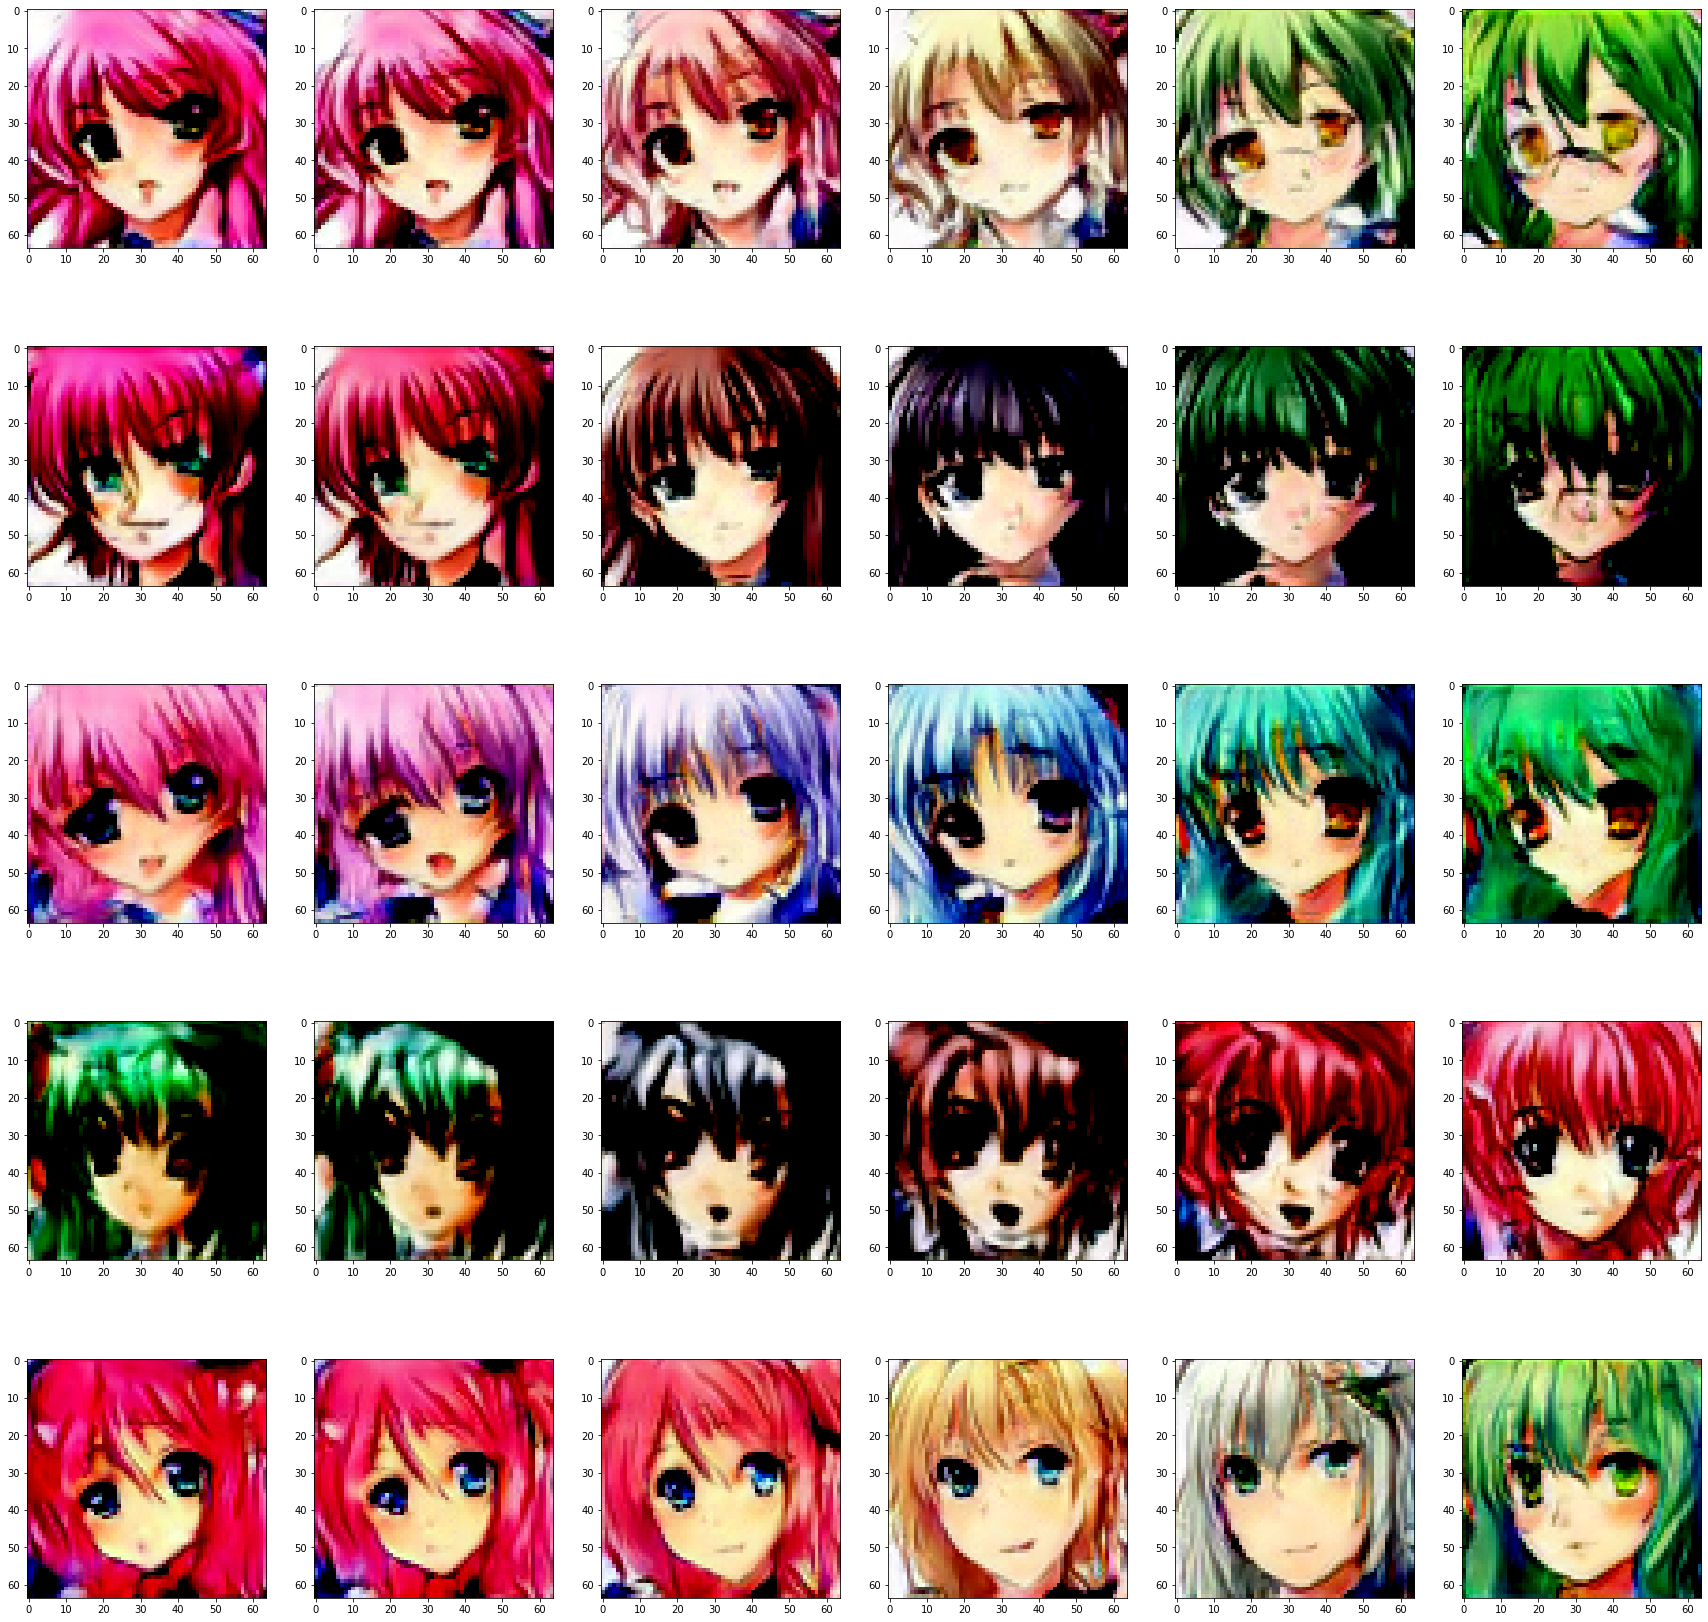

In [8]:
step = int(math.log(512,2))-2
fig, axs = plt.subplots(5,6, figsize=(30,30))

for idx in range(5):
  z_0 = np.random.randn(512)
  z_s = manipulate(z_0, "hair", "green", ["hair_length", "eyes"], start=-5.0, end=5.0)
  for i, z in enumerate(z_s):
    out = G(torch.tensor(z).view(1,-1).float(), step=step)
    img = out[0].permute([1,2,0]).detach().cpu().numpy()
    img = np.clip(img, 0, 1)
    axs[idx, i].imshow(img)

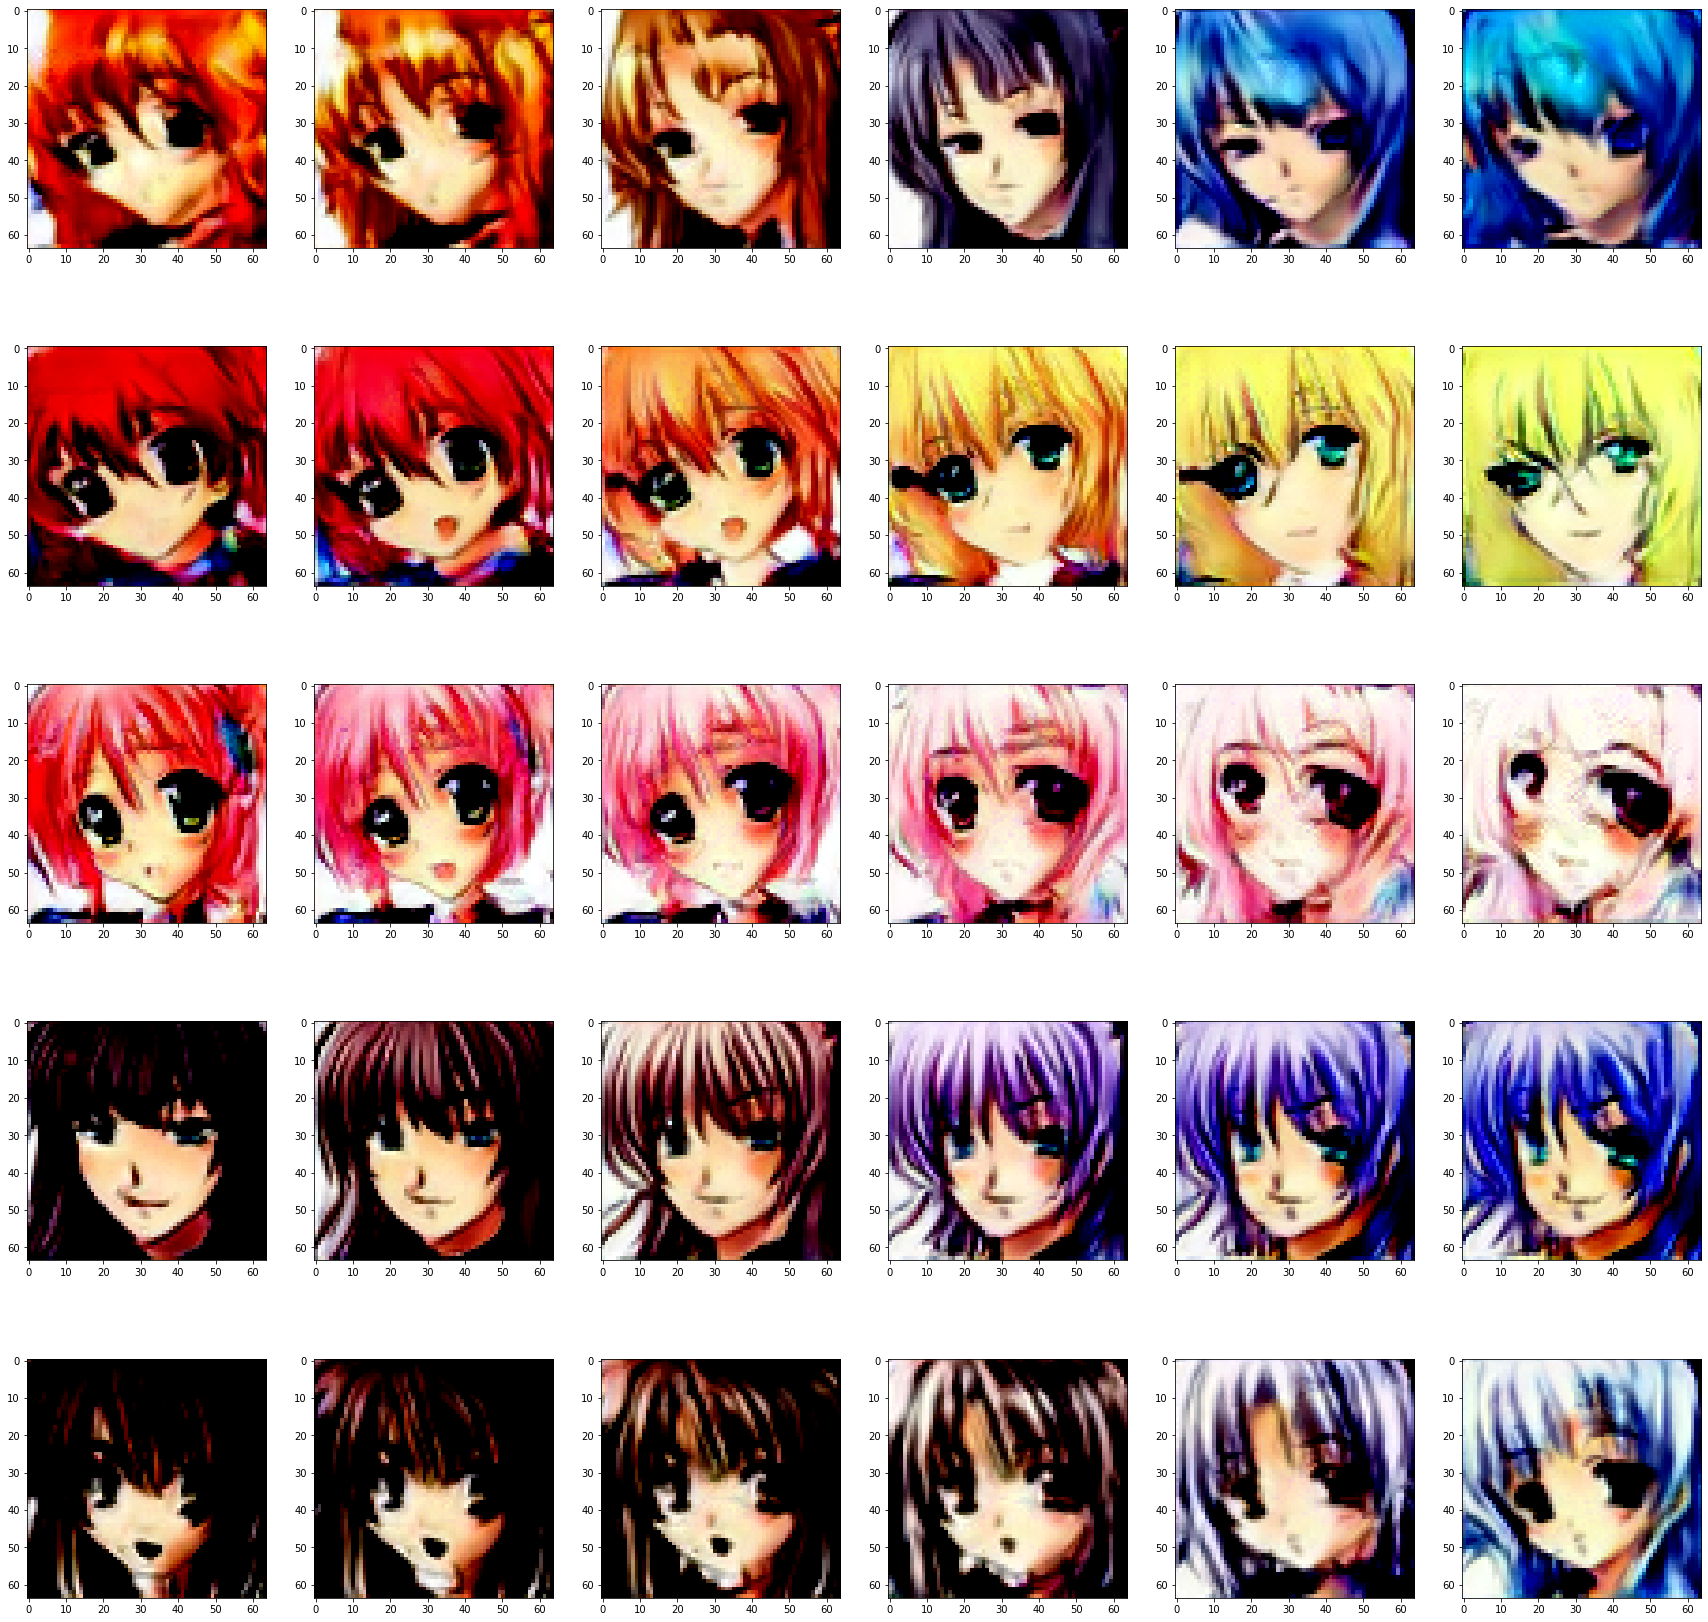

In [9]:
step = int(math.log(512,2))-2
fig, axs = plt.subplots(5,6, figsize=(30,30))

for idx in range(5):
  z_0 = np.random.randn(512)
  z_s = manipulate(z_0, "hair", "red", start=-5.0, end=5.0)
  for i, z in enumerate(z_s):
    out = G(torch.tensor(z).view(1,-1).float(), step=step)
    img = out[0].permute([1,2,0]).detach().cpu().numpy()
    img = np.clip(img, 0, 1)
    axs[idx, i].imshow(img)

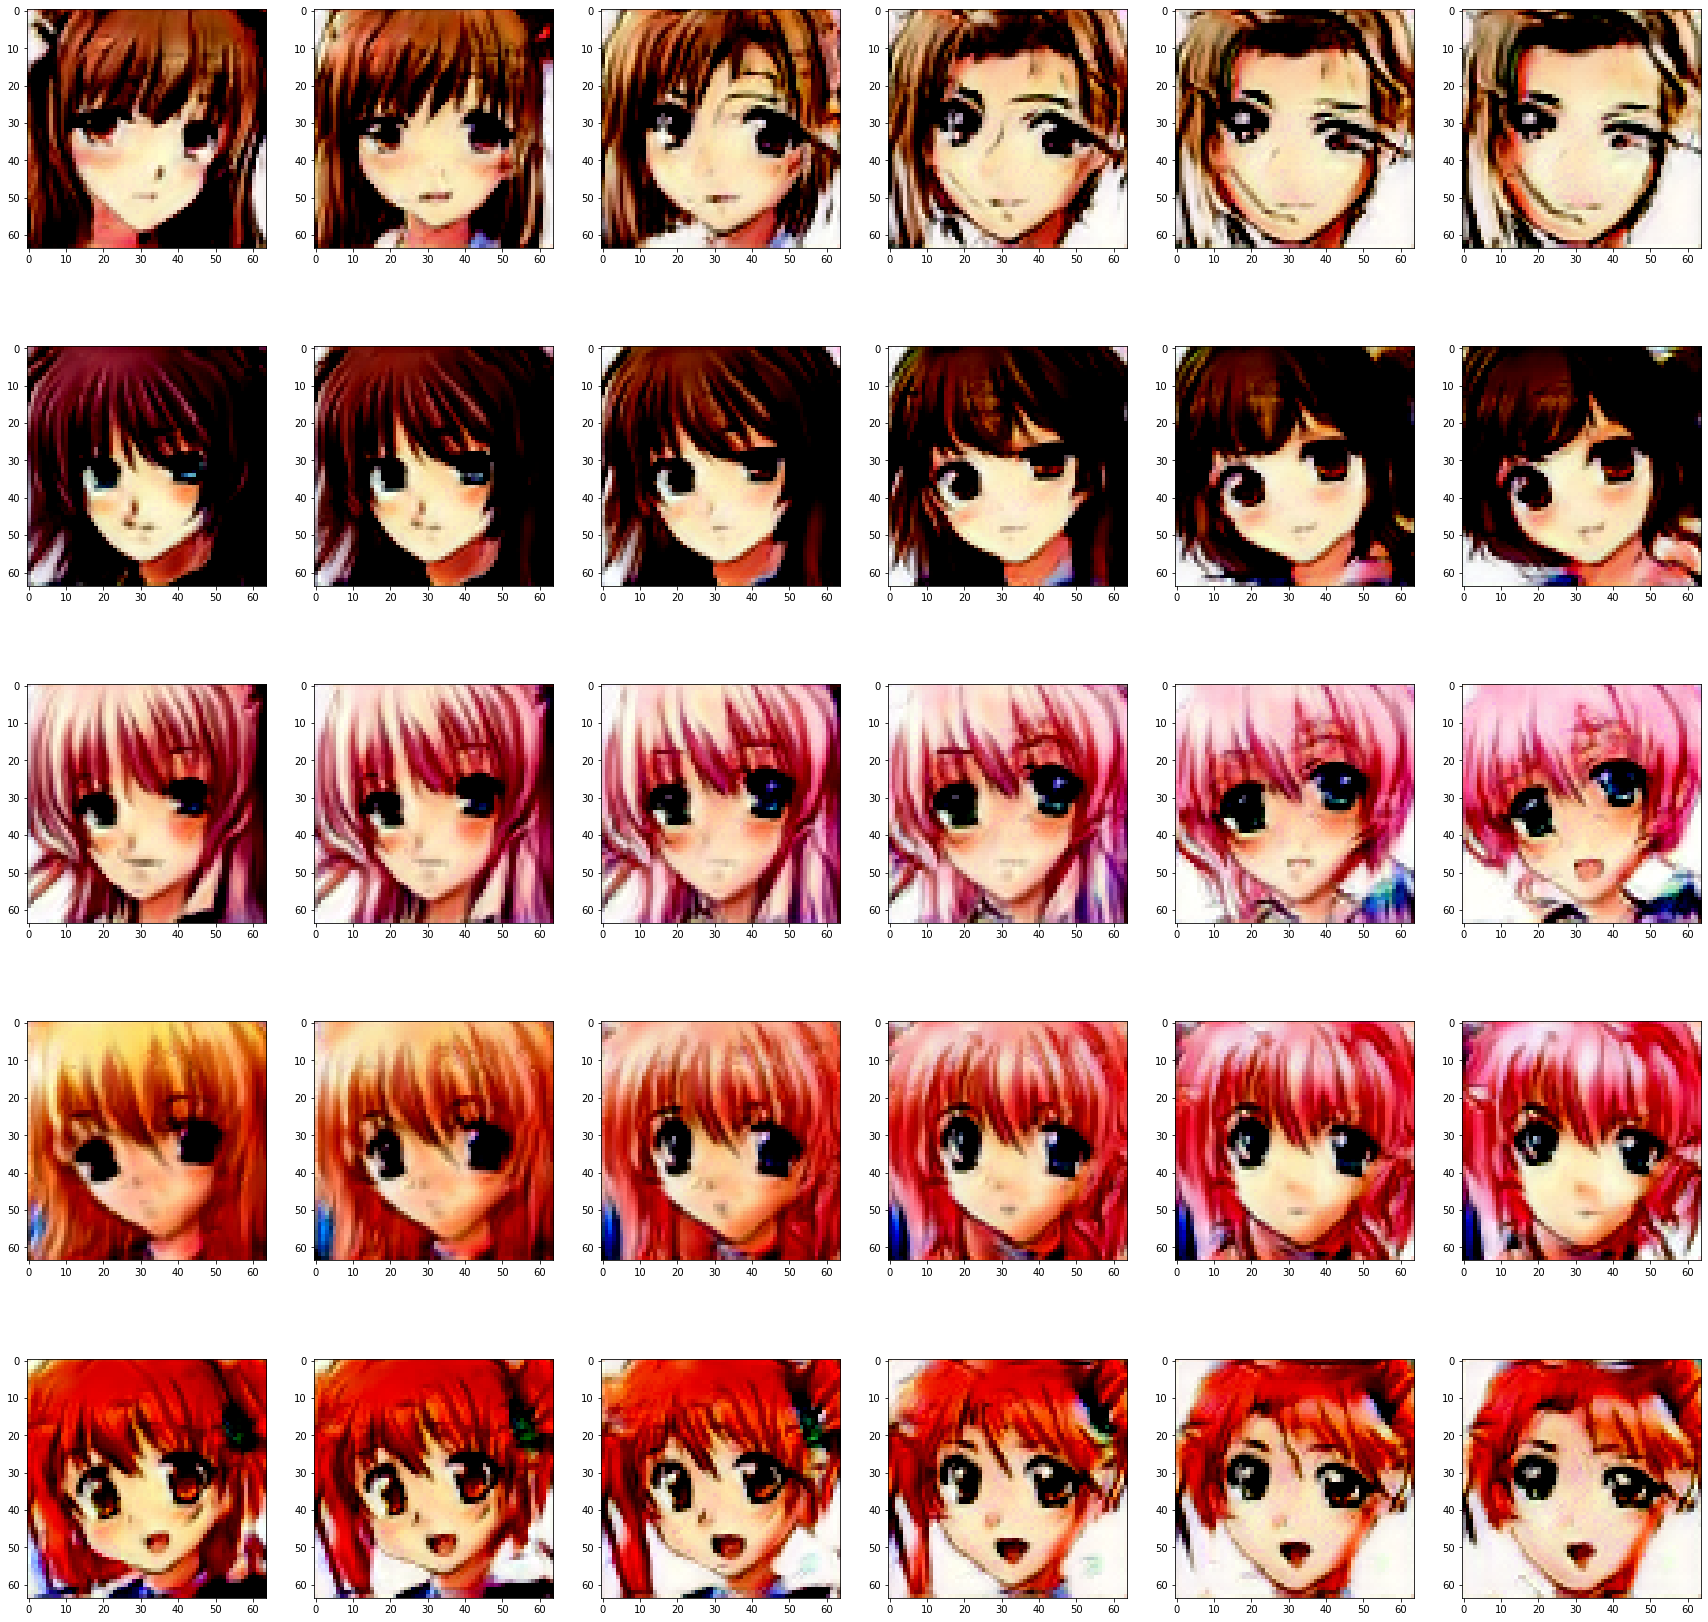

In [10]:
step = int(math.log(512,2))-2
fig, axs = plt.subplots(5,6, figsize=(30,30))

for idx in range(5):
  z_0 = np.random.randn(512)
  z_s = manipulate(z_0, "hair_length", "long", ["hair", "eyes"], start=-5.0, end=5.0)
  for i, z in enumerate(z_s):
    out = G(torch.tensor(z).view(1,-1).float(), step=step)
    img = out[0].permute([1,2,0]).detach().cpu().numpy()
    img = np.clip(img, 0, 1)
    axs[idx, i].imshow(img)

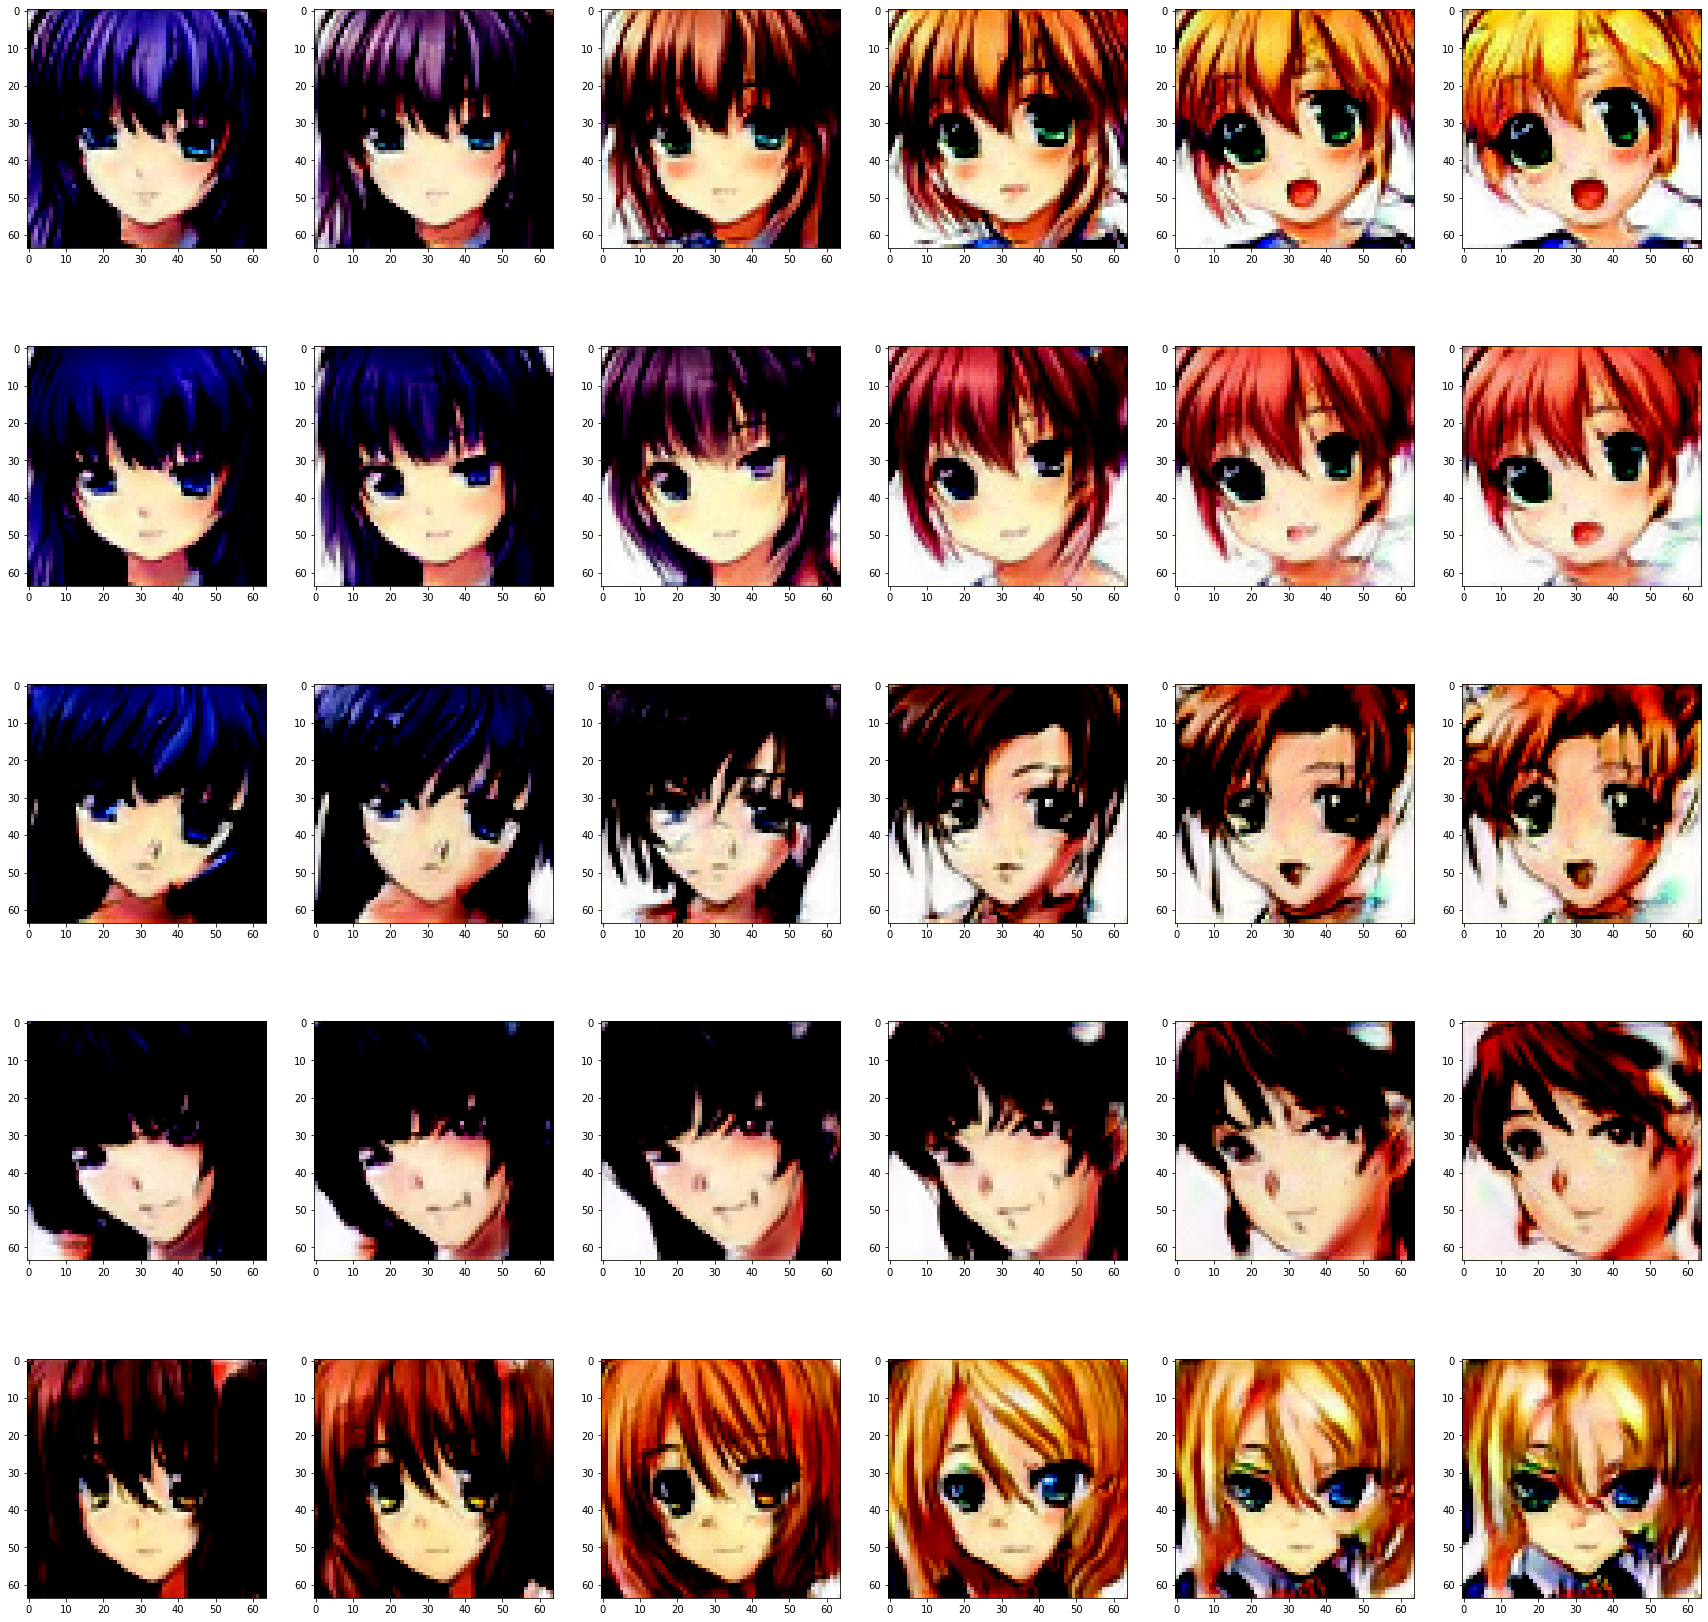

In [11]:
step = int(math.log(512,2))-2
fig, axs = plt.subplots(5,6, figsize=(30,30))

for idx in range(5):
  z_0 = np.random.randn(512)
  z_s = manipulate(z_0, "hair_length", "short", start=-5.0, end=5.0)
  for i, z in enumerate(z_s):
    out = G(torch.tensor(z).view(1,-1).float(), step=step)
    img = out[0].permute([1,2,0]).detach().cpu().numpy()
    img = np.clip(img, 0, 1)
    axs[idx, i].imshow(img)